In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as st
from util import compute_ci

df = pd.read_csv("systematic.csv", index_col=0).rename(columns={"probs": "x"})

In [2]:
mean_df = df.groupby("x").mean().reset_index()
mean_df

,x,1,3,10
0,0.1,0.047239,0.069206,0.073796
1,0.2,0.180314,0.170981,0.165906
2,0.3,0.262803,0.275250,0.261739
3,0.4,0.352158,0.371198,0.385843
4,0.5,0.477254,0.482871,0.496236
5,0.6,0.583425,0.605834,0.623429
6,0.7,0.667704,0.711506,0.720499
7,0.8,0.798457,0.824010,0.830162
8,0.9,0.943841,0.932525,0.917281


In [3]:
ci_df = compute_ci(df)

/home/yannikkellerde/miniconda3/envs/sh_finetuning/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/yannikkellerde/miniconda3/envs/sh_finetuning/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [4]:
ci_df

x         1                   3                  10          
            0.05      0.95      0.05      0.95      0.05      0.95
0  0.1  0.030149  0.064329  0.054209  0.084204  0.063996  0.083596
1  0.2  0.150746  0.209882  0.156452  0.185510  0.153182  0.178631
2  0.3  0.234237  0.291369  0.261094  0.289407  0.253605  0.269872
3  0.4  0.327469  0.376847  0.356216  0.386179  0.376389  0.395297
4  0.5  0.446301  0.508206  0.465477  0.500266  0.487497  0.504975
5  0.6  0.542438  0.624412  0.587587  0.624081  0.609740  0.637118
6  0.7  0.633460  0.701947  0.694878  0.728134  0.709038  0.731960
7  0.8  0.765132  0.831783  0.805717  0.842304  0.816913  0.843410
8  0.9  0.921008  0.966675  0.916386  0.948664  0.905981  0.928582

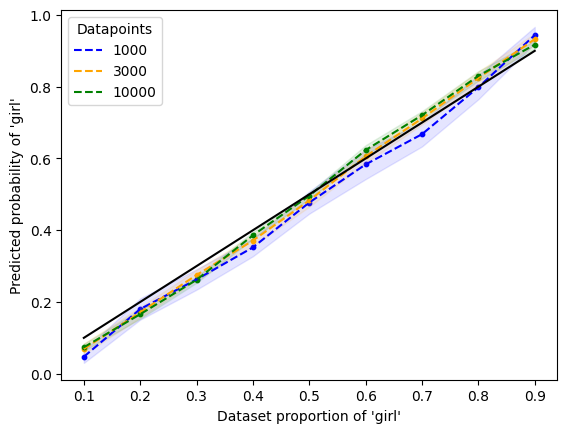

In [5]:
def plot_percentages(mean_df, ci_df):
    plt.scatter(mean_df["x"], mean_df["1"], color="blue", s=10)
    plt.plot(mean_df["x"], mean_df["1"], "--", color="blue", label="1000")
    plt.fill_between(
        ci_df["x"],
        ci_df["1"][0.05],
        ci_df["1"][0.95],
        color="blue",
        alpha=0.1,
    )
    plt.scatter(mean_df["x"], mean_df["3"], color="orange", s=10)
    plt.plot(mean_df["x"], mean_df["3"], "--", color="orange", label="3000")
    plt.fill_between(
        ci_df["x"], ci_df["3"][0.05], ci_df["3"][0.95], color="orange", alpha=0.1
    )
    plt.scatter(mean_df["x"], mean_df["10"], color="green", s=10)
    plt.plot(mean_df["x"], mean_df["10"], "--", color="green", label="10000")
    plt.fill_between(
        ci_df["x"], ci_df["10"][0.05], ci_df["10"][0.95], color="green", alpha=0.1
    )
    plt.plot(mean_df["x"], mean_df["x"], "-", color="black")
    plt.legend(title="Datapoints")


plot_percentages(mean_df, ci_df)
plt.xlabel("Dataset proportion of 'girl'")
plt.ylabel("Predicted probability of 'girl'")
plt.savefig("plots/dataset_percentage.png")

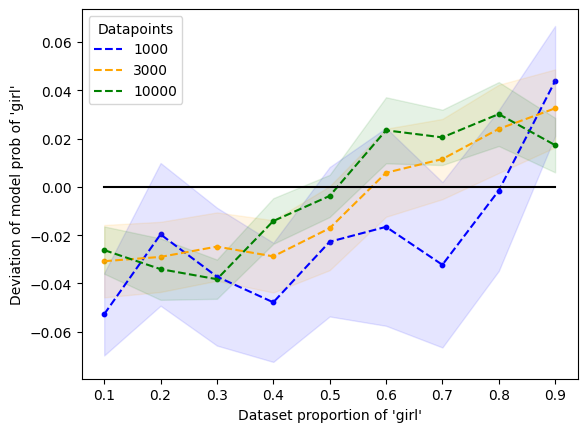

In [6]:
def plot_deviation(mean_df, ci_df):
    plt.scatter(mean_df["x"], mean_df["1"] - mean_df["x"], color="blue", s=10)
    plt.plot(
        mean_df["x"], mean_df["1"] - mean_df["x"], "--", color="blue", label="1000"
    )
    plt.fill_between(
        ci_df["x"],
        ci_df["1"][0.05] - mean_df["x"],
        ci_df["1"][0.95] - mean_df["x"],
        color="blue",
        alpha=0.1,
    )
    plt.scatter(mean_df["x"], mean_df["3"] - mean_df["x"], color="orange", s=10)
    plt.plot(
        mean_df["x"], mean_df["3"] - mean_df["x"], "--", color="orange", label="3000"
    )
    plt.fill_between(
        ci_df["x"],
        ci_df["3"][0.05] - mean_df["x"],
        ci_df["3"][0.95] - mean_df["x"],
        color="orange",
        alpha=0.1,
    )
    plt.scatter(mean_df["x"], mean_df["10"] - mean_df["x"], color="green", s=10)
    plt.plot(
        mean_df["x"], mean_df["10"] - mean_df["x"], "--", color="green", label="10000"
    )
    plt.fill_between(
        ci_df["x"],
        ci_df["10"][0.05] - mean_df["x"],
        ci_df["10"][0.95] - mean_df["x"],
        color="green",
        alpha=0.1,
    )
    plt.plot(mean_df["x"], [0] * len(mean_df["x"]), "-", color="black")
    plt.legend(title="Datapoints")


plot_deviation(mean_df, ci_df)
plt.xlabel("Dataset proportion of 'girl'")
plt.ylabel("Deviation of model prob of 'girl'")
plt.savefig("plots/dataset_deviation.png")

In [7]:
df_eos = pd.read_csv("systematic-eos.csv", index_col=0).rename(columns={"probs": "x"})
mean_df_eos = df_eos.groupby("x").mean().reset_index()
ci_df_eos = compute_ci(df_eos)

/home/yannikkellerde/miniconda3/envs/sh_finetuning/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/yannikkellerde/miniconda3/envs/sh_finetuning/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [8]:
ci_df_eos

x         1                   3                  10          
            0.05      0.95      0.05      0.95      0.05      0.95
0  0.1  0.088131  0.106889  0.092262  0.108101  0.095033  0.100909
1  0.2  0.190333  0.225420  0.188344  0.206372  0.198334  0.207790
2  0.3  0.297546  0.354369  0.304035  0.329687  0.323346  0.337120
3  0.4  0.404153  0.472404  0.377907  0.405885  0.412811  0.425248
4  0.5  0.542834  0.598910  0.483682  0.508342  0.517355  0.535164
5  0.6  0.675805  0.735068  0.600011  0.630104  0.632803  0.645973
6  0.7  0.756379  0.847976  0.710424  0.739997  0.741231  0.752790
7  0.8  0.871419  0.938677  0.880153  0.898702  0.890581  0.901832
8  0.9  0.996888  0.998712  0.997757  0.998527  0.998146  0.998413

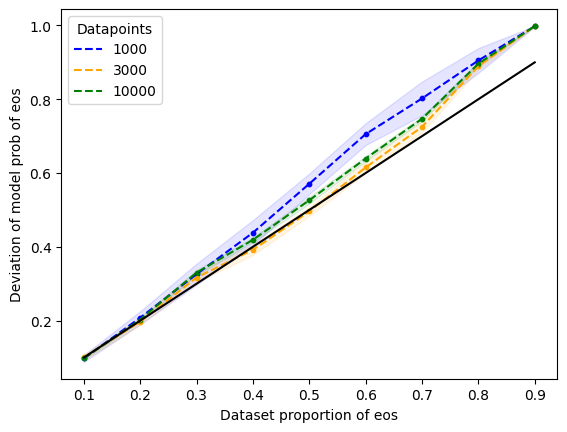

In [9]:
plot_percentages(mean_df_eos, ci_df_eos)

plt.xlabel("Dataset proportion of eos")
plt.ylabel("Deviation of model prob of eos")
plt.savefig("plots/eos_percentage.png")

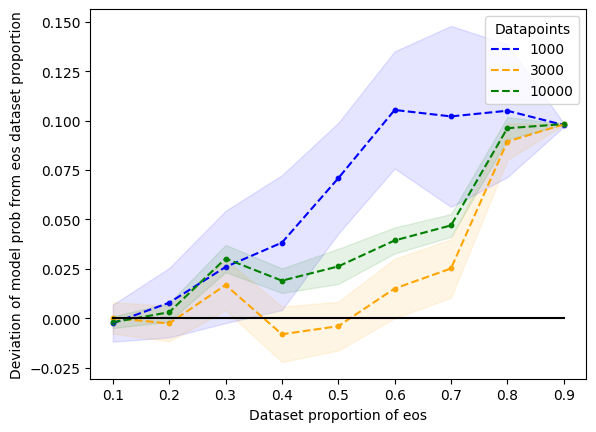

In [10]:
plot_deviation(mean_df_eos, ci_df_eos)
plt.xlabel("Dataset proportion of eos")
plt.ylabel("Deviation of model prob from eos dataset proportion")
plt.savefig("plots/eos_deviation.png")